# Data importation

## 🔍 Understanding the Data


In [37]:
import pandas as pd
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows (be careful with large data!)
pd.set_option('display.max_rows', None)

# Don't truncate column contents
pd.set_option('display.max_colwidth', None)  # For pandas >= 1.0
# Prevent scientific notation for numbers
pd.set_option('display.float_format', '{:.2f}'.format)
data = pd.read_csv("~/Downloads/week5_customer_reviews.csv")
data.columns



Index(['review_id', 'customer_name', 'raw_review', 'product', 'rating', 'date',
       'cleaned_review', 'review_length'],
      dtype='object')

# What are the main columns in the dataset and what does each represent?

| Column Name          | Description                                                                                                                                                                     |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`review_id`**      | A unique identifier for each review. Useful for referencing or tracking specific reviews.                                                                                       |
| **`customer_name`**  | The name of the customer who wrote the review. May be useful for analyzing repeat reviewers or customer behavior.                                                               |
| **`raw_review`**     | The original review text exactly as written by the customer. May include typos, punctuation, emojis, etc.                                                                       |
| **`product`**        | The name or ID of the product being reviewed. Helps group or compare reviews across different products.                                                                         |
| **`rating`**         | The numerical rating given by the customer (e.g., from 1 to 5). Useful for sentiment analysis or quality scoring.                                                               |
| **`date`**           | The date when the review was written. Useful for time-based analysis or trends.                                                                                                 |
| **`cleaned_review`** | The processed version of `raw_review`, typically cleaned by removing stopwords, punctuation, and applying lowercasing, etc. This is what you'd usually use for NLP or modeling. |
| **`review_length`**  | The number of words or characters in the cleaned review. Useful for analyzing verbosity or filtering short/long reviews.                                                        |


## What are some examples of messy elements in the raw_review column?

| Row | Messy Elements       | Explanation                                                                   |
| --- | -------------------- | ----------------------------------------------------------------------------- |
| 0   | `han️️\@🗑;🔥d`      | Emojis (`🗑`, `🔥`), special characters (`\@`, `;`), garbled Unicode          |
| 1   | `emplo\(yee on.`     | Escape characters (`\(`), likely a typo or broken word                        |
| 2   | `p~{}#layer`         | Mixed special characters (`~`, `{}`, `#`), corrupted text                     |
| 3   | `missi:🙄="🔥'#__on` | Emojis (`🙄`, `🔥`), strange punctuation mix (`:="🔥'#_`)                     |
| 4   | `m~,(!🗑@!:~y`       | Heavy use of punctuation and symbols (`~,(!@!:~`), emoji (`🗑`), broken words |


## How many unique products are reviewed in the dataset?

### ✅ **7 unique products:**

1. **Toaster**
2. **Smartwatch**
3. **Phone Case**
4. **Headphones**
5. **Shoes**
6. **Blender**
7. **Mug**



In [38]:
data["product"].unique()

array(['Toaster', 'Smartwatch', 'Phone Case', 'Headphones', 'Shoes',
       'Blender', 'Mug'], dtype=object)

# 🧼 Cleaning Tasks

## How can you remove all special characters, emojis, and numbers from the raw_review column using Python?

You can clean the `raw_review` column in your DataFrame by **removing all special characters, emojis, and numbers** using **regular expressions** in combination with Python string processing tools like `re`.

Here's a complete example:

---

### ✅ **Cleaning Function**

```python
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove special characters and numbers (keep only letters and spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Remove extra spaces and lowercase everything
    text = re.sub(r'\s+', ' ', text).strip().lower()
    
    return text
```

---

### 🧼 **Apply It to `raw_review` Column**

```python
data['cleaned_review'] = data['raw_review'].apply(clean_text)
```





## Write a function in Python that strips extra spaces and lowercases the review text.



1. **Removes extra spaces** (leading, trailing, and multiple spaces in between words)
2. **Converts all characters to lowercase**

---

### ✅ Function: Strip Extra Spaces & Lowercase

```python
def clean_basic(text):
    if pd.isnull(text):
        return ""
    
    # Remove leading/trailing whitespace and reduce multiple spaces to one
    cleaned = ' '.join(text.strip().split())
    
    # Convert to lowercase
    return cleaned.lower()
```

---

### 🔄 Apply to Your DataFrame

```python
data['cleaned_review'] = data['raw_review'].apply(clean_basic)
```







## What is the difference between raw_review and cleaned_review after text cleaning? Illustrate with 3 examples

In [39]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove special characters and numbers (keep only letters and spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Remove extra spaces and lowercase everything
    text = re.sub(r'\s+', ' ', text).strip().lower()
    
    return text
data['cleaned_review'] = data['raw_review'].apply(clean_text)






In [40]:
def clean_basic(text):
    if pd.isnull(text):
        return ""
    
    # Remove leading/trailing whitespace and reduce multiple spaces to one
    cleaned = ' '.join(text.strip().split())
    
    # Convert to lowercase
    return cleaned.lower()

data['cleaned_review'] =data['cleaned_review'].apply(clean_basic)



## 🧮 1. **Compute Number of Words in Each Review**

To compute the number of words in each `cleaned_review`:

```python
# Ensure NaNs don't cause errors
data['review_length'] = data['cleaned_review'].fillna('').apply(lambda x: len(x.split()))
```

This counts how many space-separated tokens (words) are in each review.

---

## 😄 2. **Categorize Reviews as Positive / Neutral / Negative**

You can categorize sentiment based on the `rating` column:

```python
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['rating'].apply(get_sentiment)
```

---

## 📉 3. **Which Product Got the Most Negative Reviews (rating ≤ 2)?**

You can filter and then use `value_counts()`:

```python
# Filter negative reviews
negative_reviews = data[data['rating'] <= 2]

# Count by product
most_negative_product = negative_reviews['product'].value_counts().idxmax()
count = negative_reviews['product'].value_counts().max()

print(f"The product with the most negative reviews is '{most_negative_product}' with {count} reviews.")
```

If you want to see **all products ranked** by number of negative reviews:

```python
print(negative_reviews['product'].value_counts())
```

---


In [41]:
# Ensure NaNs don't cause errors
data['review_length'] = data['cleaned_review'].fillna('').apply(lambda x: len(x.split()))



def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['rating'].apply(get_sentiment)


In [42]:
# Filter negative reviews
negative_reviews = data[data['rating'] <= 2]

# Count by product
most_negative_product = negative_reviews['product'].value_counts().idxmax()
count = negative_reviews['product'].value_counts().max()

print(f"The product with the most negative reviews is '{most_negative_product}' with {count} reviews.")


The product with the most negative reviews is 'Blender' with 316 reviews.



## 📊 **Bar Chart: Number of Reviews per Product**

### 🔍 Insight:

* All products have a **similar number of reviews** (\~700 each).
* This balance suggests that the dataset may have been sampled evenly across products, which is good for **unbiased product comparison**.
* Products like **Headphones, Shoes, and Mugs** slightly edge out others in review count, but differences are minor.

---

## 📦 **Review Length vs Rating (Boxplot)**

### 🔍 Insight:

* The **median review length is nearly identical across all ratings** (centered around 9 words).
* Some 5-star reviews have outliers on the longer end, but overall distribution is **very similar**.
* **Conclusion**: There's **no strong relationship between review length and sentiment/rating**.

---

## 📈 **Correlation & Averages**

```text
Average review lengths:
Negative   9.64
Neutral    9.45
Positive   9.53

Correlation between review length and rating: -0.01
```

### 🔍 Insight:

* The **correlation of -0.01** confirms that **review length and rating are nearly unrelated**.
* Slightly longer reviews appear in negative sentiment, but the difference is marginal.

---

## ✅ Summary

| Question                               | Insight                                                        |
| -------------------------------------- | -------------------------------------------------------------- |
| **Average review length by sentiment** | Very similar across all: \~9.5 words                           |
| **Most-reviewed product**              | Headphones (barely), but all are equally represented           |
| **Long reviews = better reviews?**     | **No.** Review length does **not** predict sentiment or rating |



In [43]:
avg_length_by_sentiment = data.groupby('sentiment')['review_length'].mean()
print(avg_length_by_sentiment)


sentiment
Negative   9.64
Neutral    9.45
Positive   9.53
Name: review_length, dtype: float64


/tmp/ipykernel_73229/2286281743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


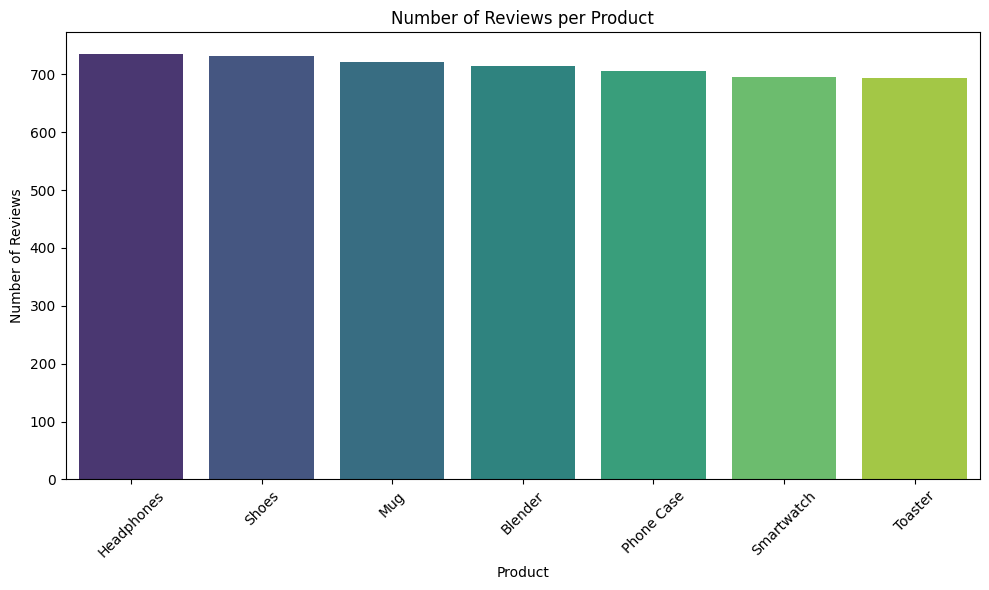

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count reviews per product
product_counts = data['product'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.title('Number of Reviews per Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
correlation = data['review_length'].corr(data['rating'])
print(f"Correlation between review length and rating: {correlation:.2f}")


Correlation between review length and rating: -0.01


/tmp/ipykernel_73229/3781088033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=data, palette='coolwarm')


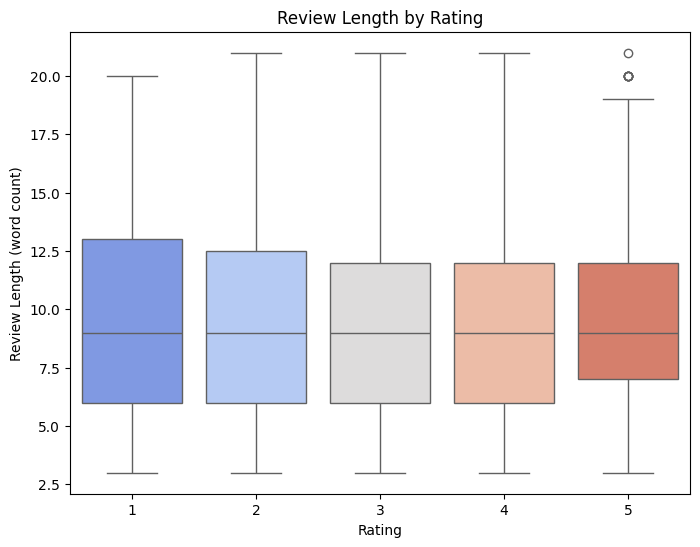

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='review_length', data=data, palette='coolwarm')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (word count)')
plt.show()
